<a href="https://colab.research.google.com/github/Vedikapote24/Codsoft/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**for that prediction we used the Logistic Regression**

In [3]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


see the top 5 records


In [5]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Cleaning

In [6]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handle Missing Values

In [31]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop 'Cabin' column only if it exists
if 'Cabin' in data.columns:
    data.drop('Cabin', axis=1, inplace=True)

**Clean**  **data**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**Feature Selection**

In [9]:
y = data['Survived']


In [10]:
X = data[['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,332,1,male,45.5,0,0,28.5000,S
733,734,2,male,23.0,0,0,13.0000,S
382,383,3,male,32.0,0,0,7.9250,S
704,705,3,male,26.0,1,0,7.8542,S
813,814,3,female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...,...
106,107,3,female,21.0,0,0,7.6500,S
270,271,1,male,28.0,0,0,31.0000,S
860,861,3,male,41.0,2,0,14.1083,S
435,436,1,female,14.0,1,2,120.0000,S


In [13]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,710,3,male,28.0,1,1,15.2458,C
439,440,2,male,31.0,0,0,10.5000,S
840,841,3,male,20.0,0,0,7.9250,S
720,721,2,female,6.0,0,1,33.0000,S
39,40,3,female,14.0,1,0,11.2417,C
...,...,...,...,...,...,...,...,...
433,434,3,male,17.0,0,0,7.1250,S
773,774,3,male,28.0,0,0,7.2250,C
25,26,3,female,38.0,1,5,31.3875,S
84,85,2,female,17.0,0,0,10.5000,S


In [14]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [15]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [16]:
print(X.dtypes)


PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object


In [17]:
X.isnull().sum()


,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [20]:
X_train_encoded = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [22]:
y_pred = model.predict(X_test_encoded)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

**The model correctly predicted 55 passengers who survive and 89 passengers who** not  **survived**

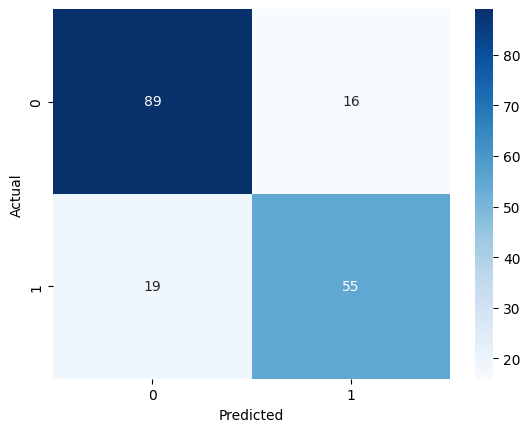

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



**Survival count**

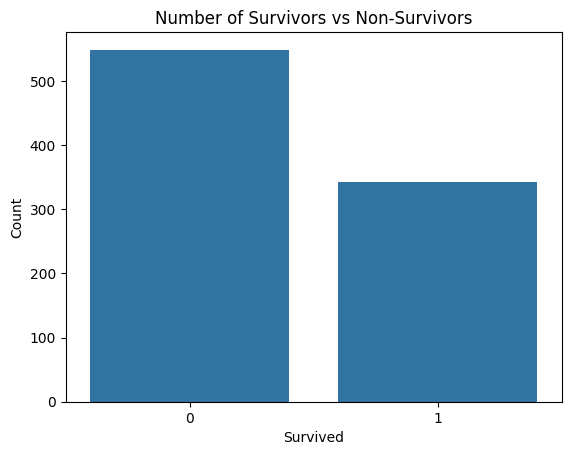

In [25]:
sns.countplot(data=data, x='Survived')
plt.title("Number of Survivors vs Non-Survivors")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()



**Survival** **by** **Sex**

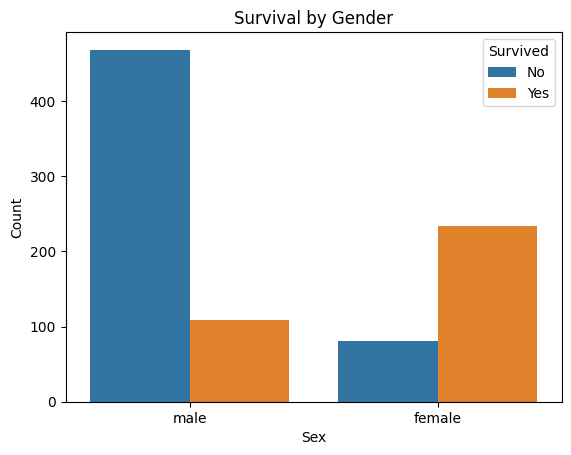

In [26]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
